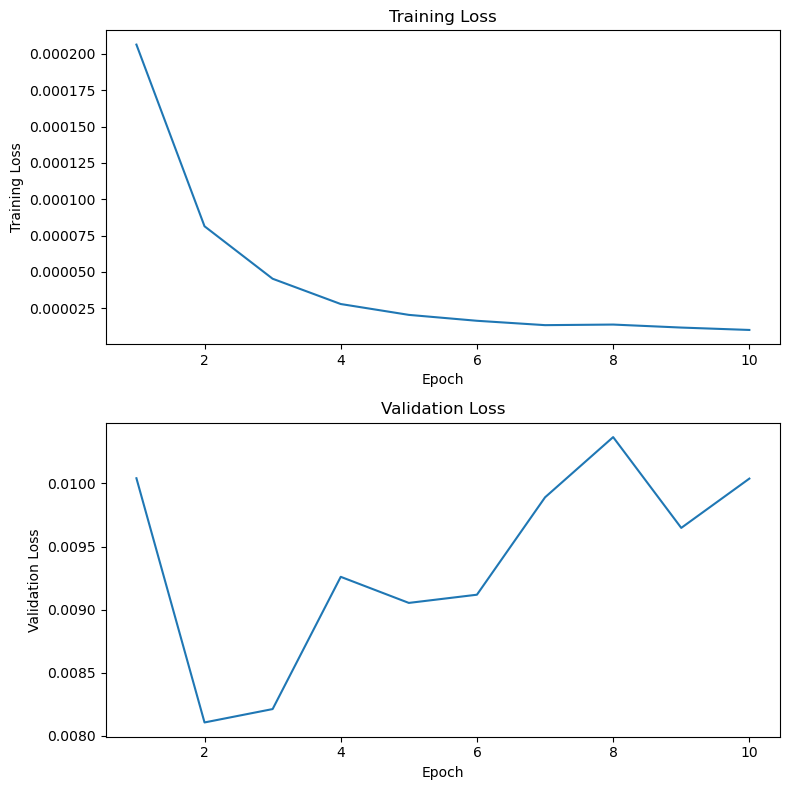

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\zhakk\Desktop\Uni\Kandidat\AML-BirdCLEFproject\AML-BirdCLEF\Data\losses.csv')


# Extract the data columns
epochs = df['Epoch']
train_loss = df['Train Loss']
val_loss = df['Val Loss']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the training loss on the first subplot
ax1.plot(epochs, train_loss)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')
ax1.set_title('Training Loss')

# Plot the validation loss on the second subplot
ax2.plot(epochs, val_loss)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Loss')
ax2.set_title('Validation Loss')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


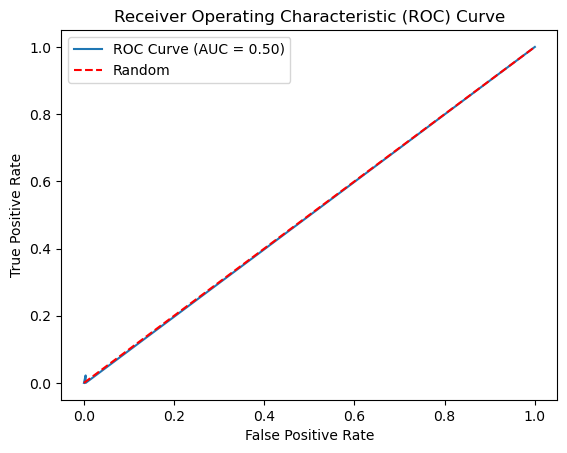

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Read the data from the file
data = pd.read_csv(r'C:\Users\zhakk\Desktop\Uni\Kandidat\AML-BirdCLEFproject\AML-BirdCLEF\Data\temp\validation_results.csv')

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = data['True Positive'] / (data['True Positive'] + data['False Negative'])
FPR = data['False Positive'] / (data['False Positive'] + data['True Negative'])

# Sort FPR and TPR arrays based on FPR values
sorted_indices = np.argsort(FPR)
FPR = FPR[sorted_indices]
TPR = TPR[sorted_indices]

# Add (0, 0) and (1, 1) points to the data
FPR = np.concatenate(([0], FPR, [1]))
TPR = np.concatenate(([0], TPR, [1]))

# Compute the area under the ROC curve (AUC)
auc_score = auc(FPR, TPR)

# Plot the ROC curve
plt.plot(FPR, TPR, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [3]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Prediction loop for the validation set
cnn.eval()
val_predictions = []
val_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        # Load data onto device, either GPU or CPU
        images = images.unsqueeze(1).to(device)
        labels = labels.to(device)

        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)

        # Convert labels and predictions to numpy arrays
        val_labels.extend(labels.cpu().numpy())
        val_predictions.extend(outputs.cpu().numpy())

# Convert labels and predictions to numpy arrays
val_labels = np.array(val_labels)
val_predictions = np.array(val_predictions)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(val_labels[:, i], val_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(val_labels.ravel(), val_predictions.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot the micro-average ROC curve
plt.figure()
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc_micro))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot the macro-average ROC curve
plt.figure()
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (AUC = {:.2f})'.format(roc_auc_macro))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


NameError: name 'cnn' is not defined